# Green's Functions and Decompositions
In this notebook we will explore the properties of the transformation matrix (function) of the signal due to propagation in a nonlinear medium.
We will also see how these matrices can be decomposed into independent supermodes.

We will compare our results to a few papers that consider this topic.

In [1]:
cd ../../src/NonlinearOptics/

/home/fpresutti/src/NonlinearOptics


In [2]:
import numpy as np
from numpy.fft import fft, ifft, fftshift

from nonlinearmedium import Chi2PDC, Chi3
from decompositions import bloch_messiah
from multimode import calcQuadratureGreens, calcCovarianceMtx, normalizedCov

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [9, 6]

# Comparisons to theoretical predictions of Green's Functions
*Pulsed squeezed light: Simultaneous squeezing of multiple modes*
Wasilewski, Lvovsky, Banaszek, Radzewicz
https://doi.org/10.1103/PhysRevA.73.063819

The paper makes analytical predictions about the Green's function in the weak generation regime.

We use the definition therein of $C, S$, the complex-valued Green's function matrices.
These are defined such that:

$$a_\text{out} = C a_\text{in} + S a_\text{in}^*$$

# Expected vs calculated Green's function:

For simplicity, we consider the case without dispersion at either pump or signal frequencies.

In the weak generation regime we expect the Green's Function $S$ to be of the form

$$
|S(\omega, \omega')| = |E_p(\omega + \omega')| L / L_{NL}
$$
and
$$
|C(\omega, \omega')| = \delta(\omega - \omega')
$$

In [4]:
length = 0.05
nFreqs = 512

crystal = Chi2PDC(relativeLength=length,
                  nlLength=1,
                  beta2=0,
                  beta2s=0,
                  pulseType=0,
                  tPrecision=nFreqs, zPrecision=20000)

crystal.runPumpSimulation()

In [5]:
weakC, weakS = crystal.computeGreensFunction(runPump=False)

Green's functions:

In [6]:
angFreqMax = np.max(np.abs(crystal.omega))
tMax = np.max(np.abs(crystal.tau))

<IPython.core.display.Javascript object>


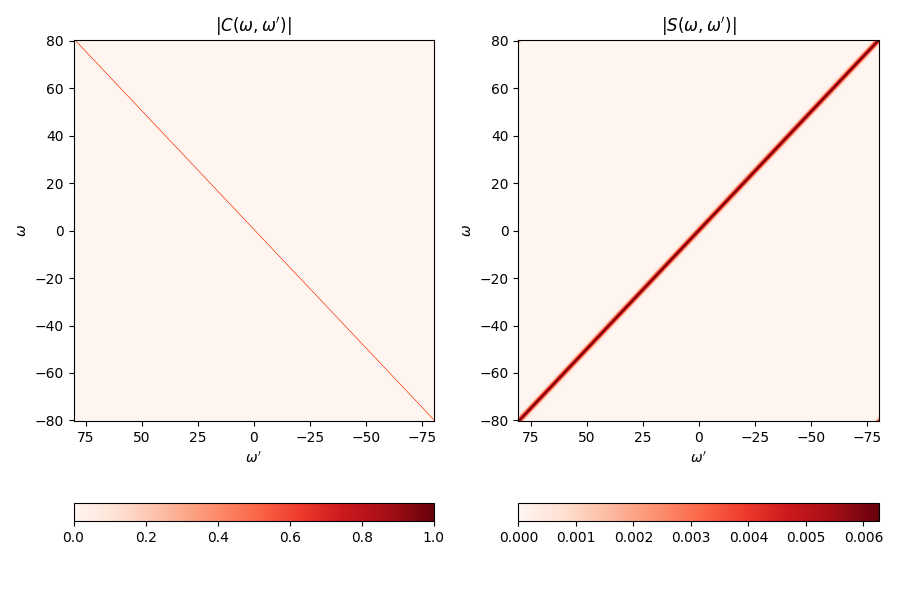

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(np.abs(weakC), aspect="auto", cmap="Reds",
           extent=[angFreqMax, -angFreqMax, -angFreqMax, angFreqMax])
plt.title("$|C(\omega, \omega')|$")
plt.xlabel("$\omega'$")
plt.ylabel("$\omega$")
plt.colorbar(orientation="horizontal")

ax = fig.add_subplot(1, 2, 2)
plt.imshow(np.abs(weakS), aspect="auto", cmap="Reds",
           extent=[angFreqMax, -angFreqMax, -angFreqMax, angFreqMax])
plt.title("$|S(\omega, \omega')|$")
plt.xlabel("$\omega'$")
plt.ylabel("$\omega$")
plt.colorbar(orientation="horizontal")

plt.tight_layout()

The cross-section of $S$: it matches the prediction that the profile should have the same shape as the pump field profile.

<IPython.core.display.Javascript object>


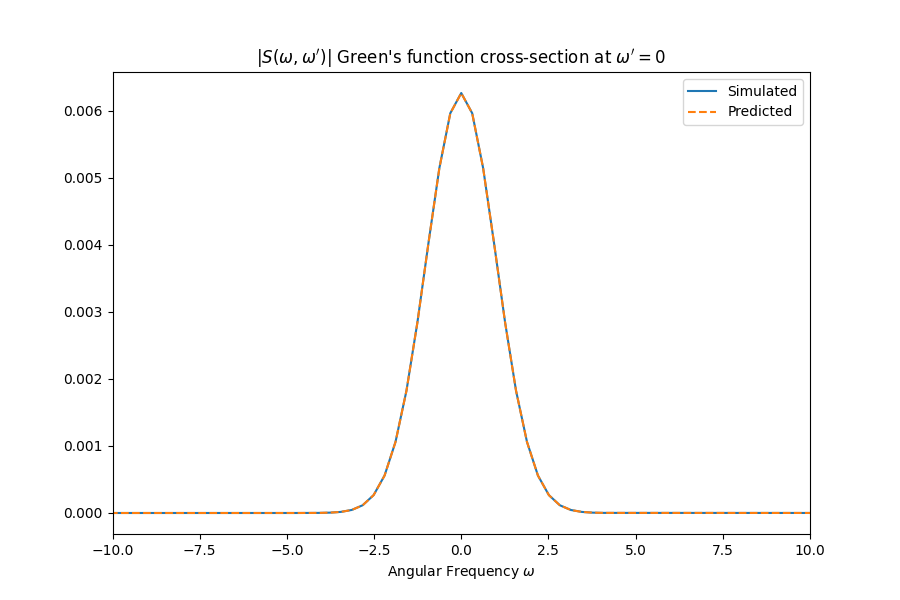

In [8]:
fig = plt.figure()
crossSection = np.abs(weakS[:, nFreqs // 2])
plt.plot(fftshift(crystal.omega), crossSection, label="Simulated")

prediction = np.abs(fftshift(crystal.pumpFreq[0] * length))
plt.plot(fftshift(crystal.omega), prediction / nFreqs, "--", label="Predicted")
plt.xlim(-10, 10)

plt.xlabel("Angular Frequency $\omega$")
plt.title("$|S(\omega,\omega')|$ Green's function cross-section at $\omega' = 0$")
plt.legend();

Similarly, for a thin crystal with negligible dispersion, the time domain Green's function should be approximately:

$$
|S(t, t')| = \delta(t - t') |E(t')| L / L_{NL}
$$

In [9]:
weakCT, weakST = crystal.computeGreensFunction(runPump=False, inTimeDomain=True)

Full functions:

<IPython.core.display.Javascript object>


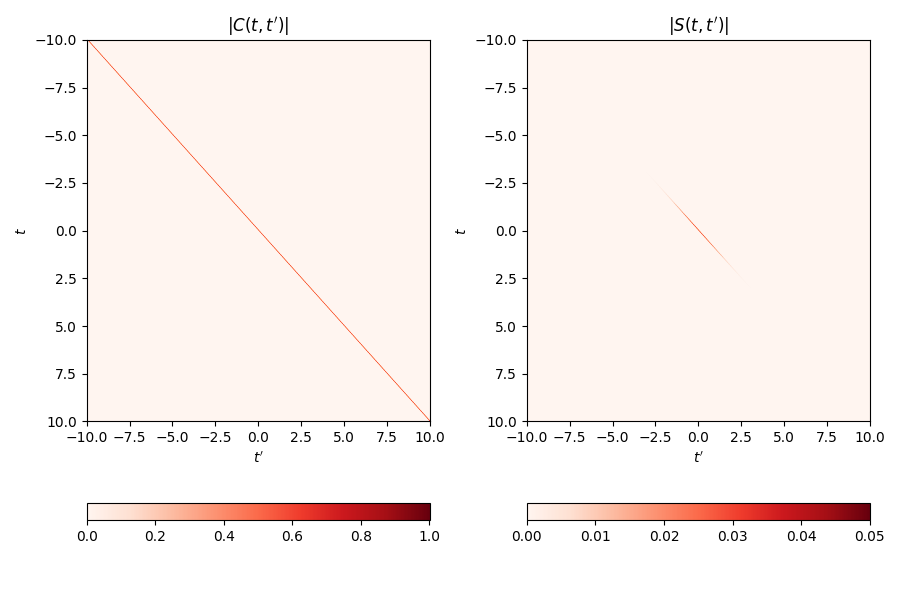

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(np.abs(weakCT), aspect="auto", cmap="Reds",
           extent=[-tMax, tMax, tMax, -tMax])
plt.title("$|C(t,t')|$")
plt.xlabel("$t'$")
plt.ylabel("$t$")
plt.colorbar(orientation="horizontal")

ax = fig.add_subplot(1, 2, 2)
plt.imshow(np.abs(weakST), aspect="auto", cmap="Reds",
           extent=[-tMax, tMax, tMax, -tMax])
plt.title("$|S(t,t')|$")
plt.xlabel("$t'$")
plt.ylabel("$t$")
plt.colorbar(orientation="horizontal")

plt.tight_layout()

Diagonal:

<IPython.core.display.Javascript object>


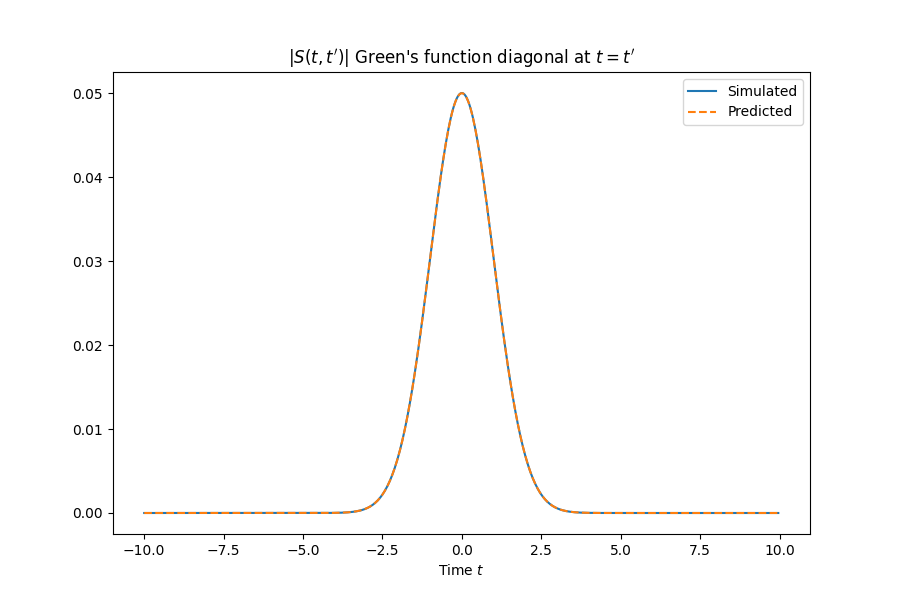

In [11]:
fig = plt.figure()
crossSection = np.abs(np.diag(weakST))
plt.plot(fftshift(crystal.tau), crossSection, label="Simulated")

prediction = np.abs(fftshift(crystal.pumpTime[0] * length))
plt.plot(fftshift(crystal.tau), prediction, "--", label="Predicted")

plt.xlabel("Time $t$")
plt.title("$|S(t,t')|$ Green's function diagonal at $t=t'$")
plt.legend();

# Comparisons to published simulations of Green's Functions and Bloch Messiah Decomposition
*Decomposing a pulsed optical parametric amplifier into independent squeezers*
Lvovsky, Wasilewski, Banaszek

Comparisons of the Green's function and highest order supermodes for different nonlinearities.

https://arxiv.org/abs/quant-ph/0601170

By using a rough estimate of the paper's parameters, we perform three OPA simulations, each with a factor of 10 increase in the nonlinearity.

In [12]:
relDispLength = 3.25 # mm
preChirp = -0.5 / relDispLength
nFreqs = 512

We first compute the Green's functions.

In [13]:
crys1 = Chi2PDC(relativeLength=1 / relDispLength,
                nlLength=10 / relDispLength,
                beta2=1,
                beta2s=1 / 3,
                beta1s=10,
                pulseType=0,
                chirp=preChirp,
                tMax=20,
                tPrecision=nFreqs, zPrecision=200)

crys2 = Chi2PDC(relativeLength=1 / relDispLength,
                nlLength=1 / relDispLength,
                beta2=1,
                beta2s=1 / 3,
                beta1s=10,
                pulseType=0,
                chirp=preChirp,
                tMax=20,
                tPrecision=nFreqs, zPrecision=200)

crys3 = Chi2PDC(relativeLength=1 / relDispLength,
                nlLength=0.1 / relDispLength,
                beta2=1,
                beta2s=1 / 3,
                beta1s=10,
                pulseType=0,
                chirp=preChirp,
                tMax=20,
                tPrecision=nFreqs, zPrecision=200)

angFreqMax_ = np.max(np.abs(crys1.omega))

In [14]:
C1, S1 = crys1.computeGreensFunction(nThreads=4)

In [15]:
C2, S2 = crys2.computeGreensFunction(nThreads=4)

In [16]:
C3, S3 = crys3.computeGreensFunction(nThreads=4)

# Compare to Figure 3
Green's functions for simulations with $L/L_{NL} = 0.1, 1, 10$

<IPython.core.display.Javascript object>


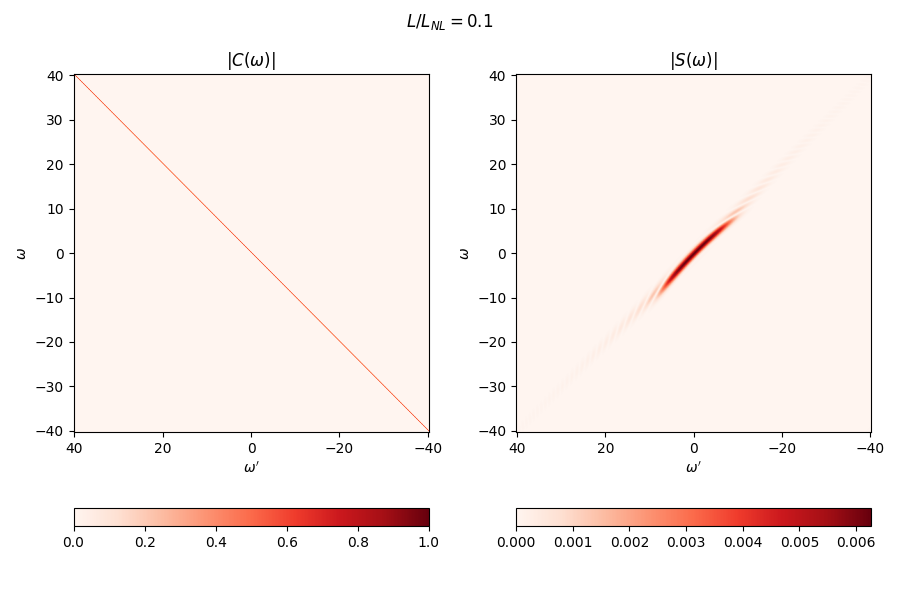

<IPython.core.display.Javascript object>


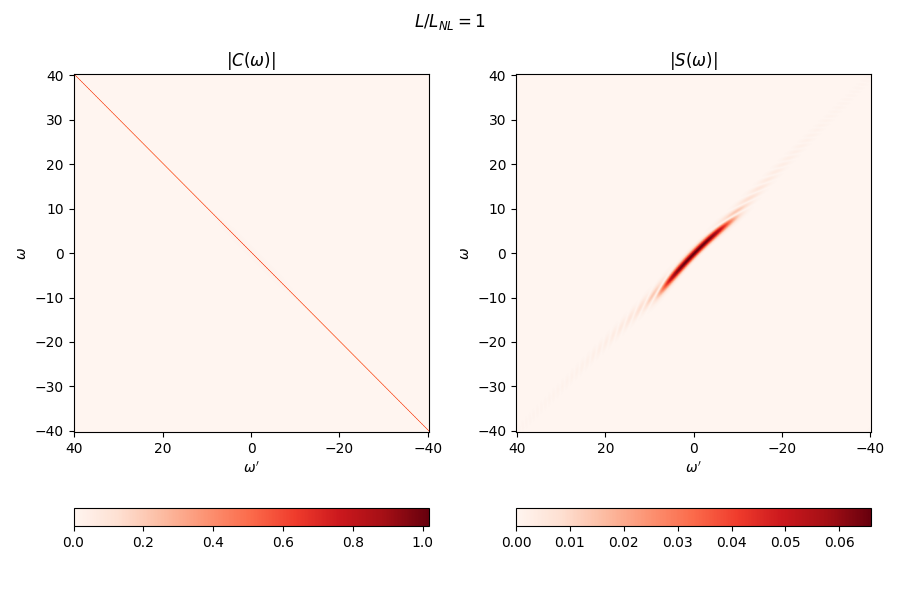

<IPython.core.display.Javascript object>


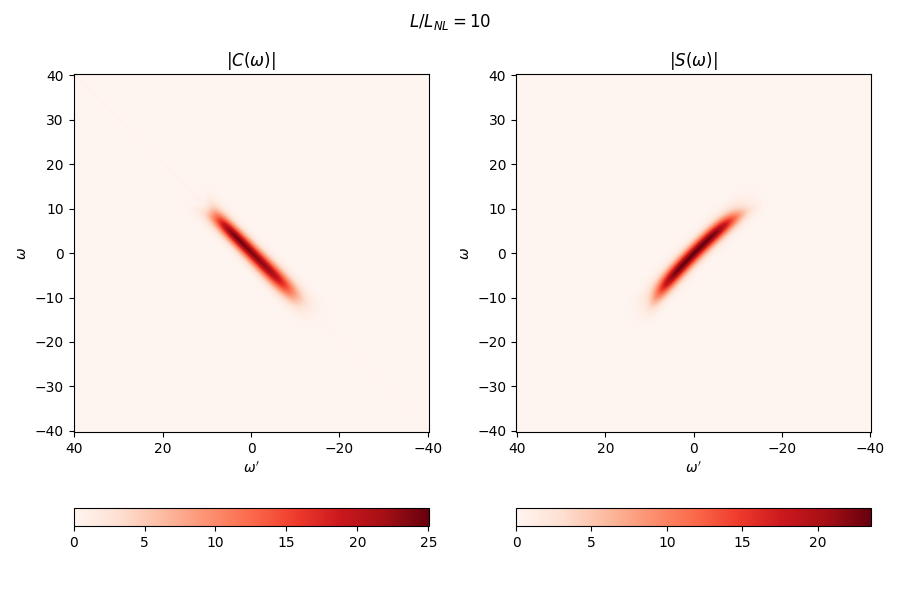

In [17]:
for C, S, nl in zip([C1, C2, C3], [S1, S2, S3], [0.1, 1, 10]):
  fig = plt.figure()

  ax = fig.add_subplot(1, 2, 1)
  plt.imshow(np.abs(C), aspect="auto", cmap="Reds",
             extent=[angFreqMax_, -angFreqMax_, -angFreqMax_, angFreqMax_])

  plt.title("$|C(\omega)|$")
  plt.xlabel("$\omega'$")
  plt.ylabel("$\omega$")
  plt.colorbar(orientation="horizontal")

  ax = fig.add_subplot(1, 2, 2)
  plt.imshow(np.abs(S), aspect="auto", cmap="Reds",
             extent=[angFreqMax_, -angFreqMax_, -angFreqMax_, angFreqMax_])

  plt.title("$|S(\omega)|$")
  plt.xlabel("$\omega'$")
  plt.ylabel("$\omega$")
  plt.colorbar(orientation="horizontal")
  plt.suptitle("$L/L_{NL}="+"{}$".format(nl))

  plt.tight_layout()

# Compute the Supermodes via the Bloch-Messiah Decomposition
To perform the decomposition, we first convert to the quadrature basis, defined as:
$$x = a^\dagger + a,\\
p = i(a^\dagger - a)
$$

In [18]:
Z1 = calcQuadratureGreens(C1, S1)
Z2 = calcQuadratureGreens(C2, S2)
Z3 = calcQuadratureGreens(C3, S3)

In [19]:
psi1, D1, phi1 = bloch_messiah(Z1, tol=5e-5)
psi2, D2, phi2 = bloch_messiah(Z2, tol=5e-5)
psi3, D3, phi3 = bloch_messiah(Z3, tol=5e-5)
eigs1 = D1.diagonal()
eigs2 = D2.diagonal()
eigs3 = D3.diagonal()

# Compare to Figure 4
We can then return to the original basis of complex-valued supermodes.
These are the spectral intensity profiles of the characteristic modes exhibiting strongest squeezing.
`psi[i]` represent the output supermodes, and `phi[i]` the output supermodes.

<IPython.core.display.Javascript object>


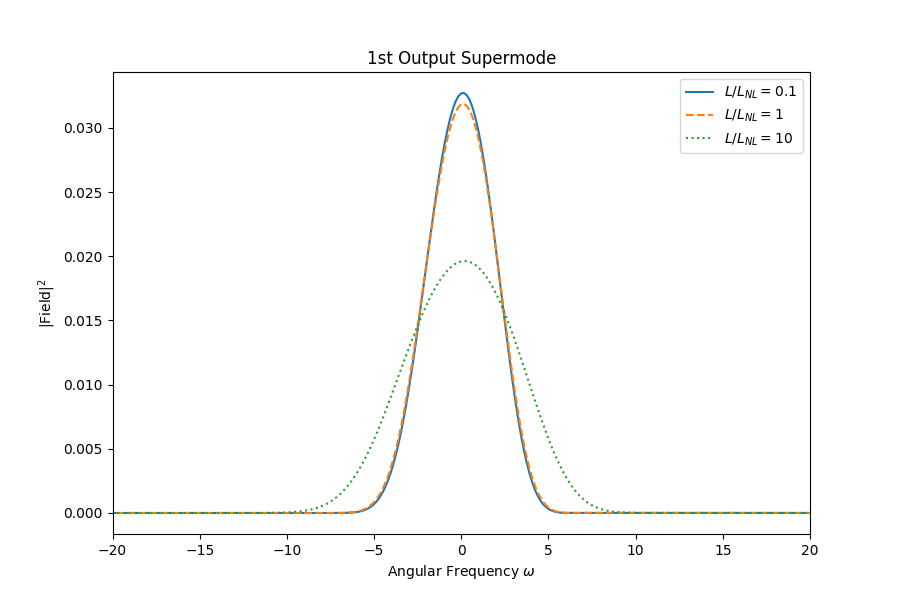

<IPython.core.display.Javascript object>


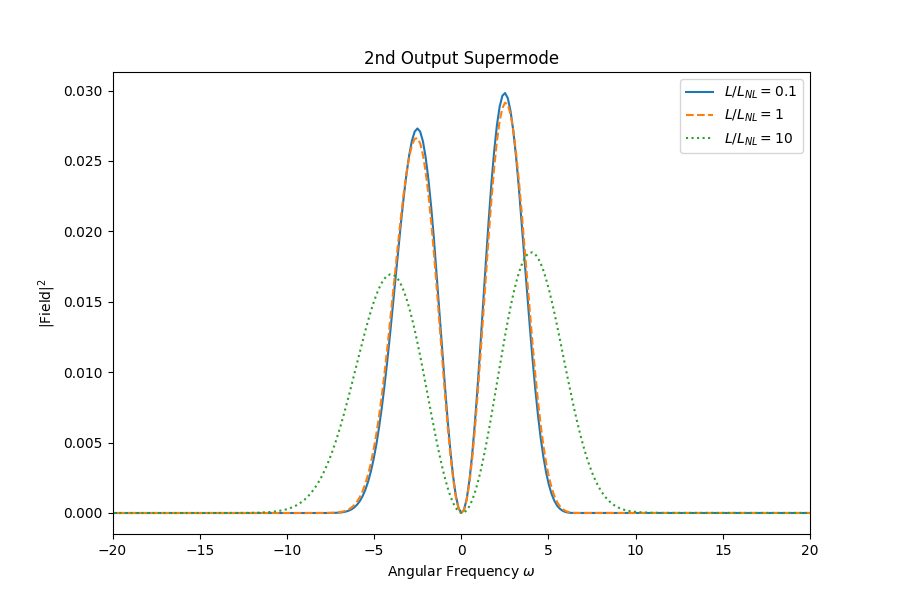

<IPython.core.display.Javascript object>


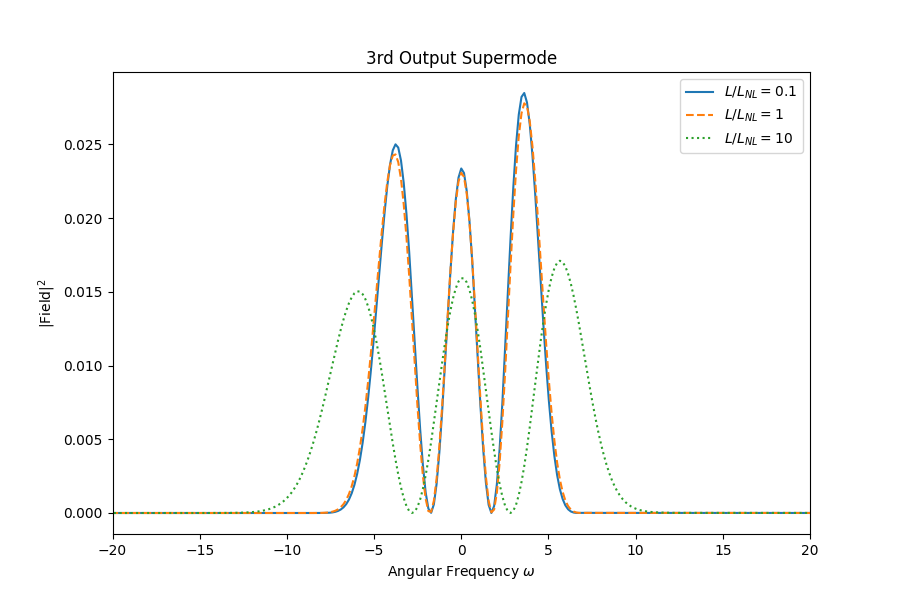

In [20]:
fig = plt.figure()
plt.plot(fftshift(crys1.omega), psi1[:nFreqs, 0]**2 + psi1[nFreqs:, 0]**2, "-",  label="$L/L_{NL}=0.1$")
plt.plot(fftshift(crys2.omega), psi2[:nFreqs, 0]**2 + psi2[nFreqs:, 0]**2, "--", label="$L/L_{NL}=1$")
plt.plot(fftshift(crys3.omega), psi3[:nFreqs, 0]**2 + psi3[nFreqs:, 0]**2, ":",  label="$L/L_{NL}=10$")
plt.xlim(-20, 20)
plt.title("1st Output Supermode")
plt.xlabel("Angular Frequency $\omega$")
plt.ylabel("|Field|$^2$")
plt.legend()

fig = plt.figure()
plt.plot(fftshift(crys1.omega), psi1[:nFreqs, 1]**2 + psi1[nFreqs:, 1]**2, "-",  label="$L/L_{NL}=0.1$")
plt.plot(fftshift(crys2.omega), psi2[:nFreqs, 1]**2 + psi2[nFreqs:, 1]**2, "--", label="$L/L_{NL}=1$")
plt.plot(fftshift(crys3.omega), psi3[:nFreqs, 1]**2 + psi3[nFreqs:, 1]**2, ":",  label="$L/L_{NL}=10$")
plt.xlim(-20, 20)
plt.title("2nd Output Supermode")
plt.xlabel("Angular Frequency $\omega$")
plt.ylabel("|Field|$^2$")
plt.legend()

fig = plt.figure()
plt.plot(fftshift(crys1.omega), psi1[:nFreqs, 2]**2 + psi1[nFreqs:, 2]**2, "-",  label="$L/L_{NL}=0.1$")
plt.plot(fftshift(crys2.omega), psi2[:nFreqs, 2]**2 + psi2[nFreqs:, 2]**2, "--", label="$L/L_{NL}=1$")
plt.plot(fftshift(crys3.omega), psi3[:nFreqs, 2]**2 + psi3[nFreqs:, 2]**2, ":",  label="$L/L_{NL}=10$")
plt.xlim(-20, 20)
plt.title("3rd Output Supermode")
plt.xlabel("Angular Frequency $\omega$")
plt.ylabel("|Field|$^2$")
plt.legend();

# Compare to Figure 5
We can also obtain the amount of squeezing from the decomposition: the symplectic eigenvalues.

<IPython.core.display.Javascript object>


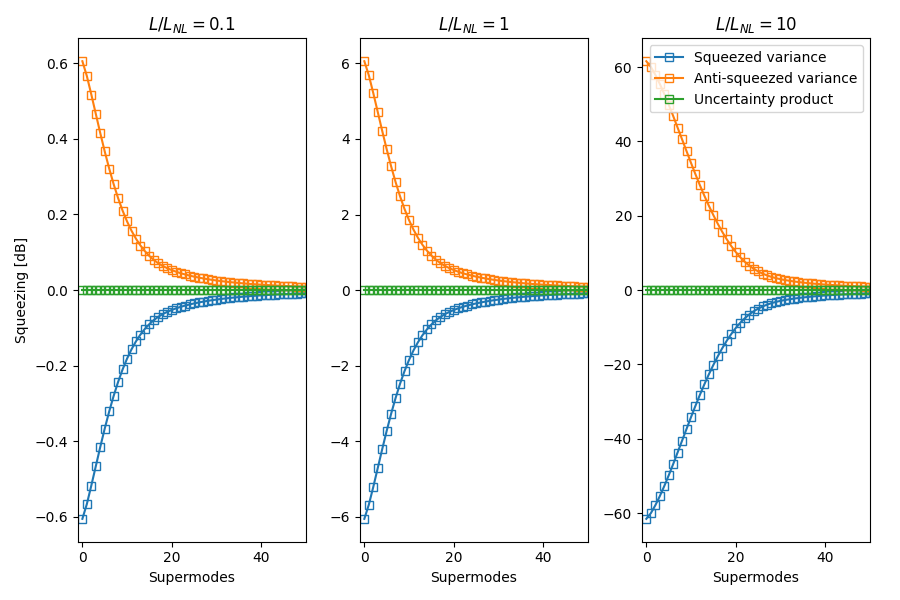

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
plt.plot(20 * np.log10(eigs1[nFreqs:]), "s-", markerfacecolor="none", label="Squeezed variance")
plt.plot(20 * np.log10(eigs1[:nFreqs]), "s-", markerfacecolor="none", label="Anti-squeezed variance")
plt.plot(10 * np.log10(eigs1[nFreqs:] * eigs1[:nFreqs]), "s-", markerfacecolor="none", label="Uncertainty product")
plt.xlabel("Supermodes")
plt.ylabel("Squeezing [dB]")
plt.title("$L/L_{NL}=0.1$")
ax.set_xlim(-1, 50)

ax = fig.add_subplot(1, 3, 2)
plt.plot(20 * np.log10(eigs2[nFreqs:]), "s-", markerfacecolor="none", label="Squeezed variance")
plt.plot(20 * np.log10(eigs2[:nFreqs]), "s-", markerfacecolor="none", label="Anti-squeezed variance")
plt.plot(10 * np.log10(eigs2[nFreqs:] * eigs2[:nFreqs]), "s-", markerfacecolor="none", label="Uncertainty product")
plt.xlabel("Supermodes")
plt.title("$L/L_{NL}=1$")
ax.set_xlim(-1, 50)

ax = fig.add_subplot(1, 3, 3)
plt.plot(20 * np.log10(eigs3[nFreqs:]), "s-", markerfacecolor="none", label="Squeezed variance")
plt.plot(20 * np.log10(eigs3[:nFreqs]), "s-", markerfacecolor="none", label="Anti-squeezed variance")
plt.plot(10 * np.log10(eigs3[nFreqs:] * eigs3[:nFreqs]), "s-", markerfacecolor="none", label="Uncertainty product")
plt.xlabel("Supermodes")
plt.title("$L/L_{NL}=10$")
ax.set_xlim(-1, 50)
plt.legend()
plt.tight_layout();

The squeezing lengths, defined as $\Lambda_n = \zeta_n L_{NL}$ in the paper, are approximately invariant for $0 \leq L/L_{NL} \leq 15$.

<IPython.core.display.Javascript object>


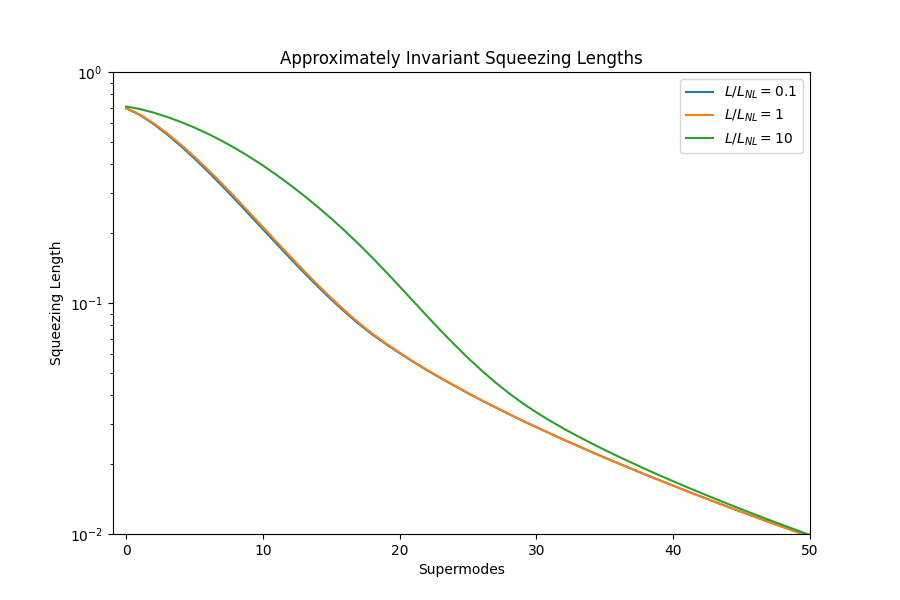

In [22]:
fig = plt.figure()
ax = fig.gca()
ax.set_xlim(-1, 50)
ax.set_ylim(0.01, 1)
plt.semilogy(np.abs(np.log(eigs1[nFreqs:]) * 10), label="$L/L_{NL}=0.1$")
plt.semilogy(np.abs(np.log(eigs2[nFreqs:]) * 1), label="$L/L_{NL}=1$")
plt.semilogy(np.abs(np.log(eigs3[nFreqs:]) * 0.1), label="$L/L_{NL}=10$")
plt.title("Approximately Invariant Squeezing Lengths")
plt.xlabel("Supermodes")
plt.ylabel("Squeezing Length")
plt.legend();

# Comparisons to simulations of Covariance Matrix and Bloch Messiah Decomposition in a $\chi^{(3)}$ medium
Comparing to *Multimode quantum theory of nonlinear propagation in optical fibers* (Appendix A)
Aruto Hosaka, Taiki Kawamori and Fumihiko Kannari
https://doi.org/10.1103/PhysRevA.94.053833

The appendix of this paper has an example of squeezing due to soliton propagation.

Compute the Green's function for the system pumped by a soliton, over a soliton period.

In [23]:
nFreqs = 512

fiber = Chi3(relativeLength=np.pi / 2,
             nlLength=1,
             beta2=-1,
             pulseType=1,
             tMax=50,
             tPrecision=nFreqs, zPrecision=100)

angFreqMax__ = np.max(np.abs(fiber.omega))

In [24]:
C, S = fiber.computeGreensFunction(nThreads=4)

Green's functions

<IPython.core.display.Javascript object>


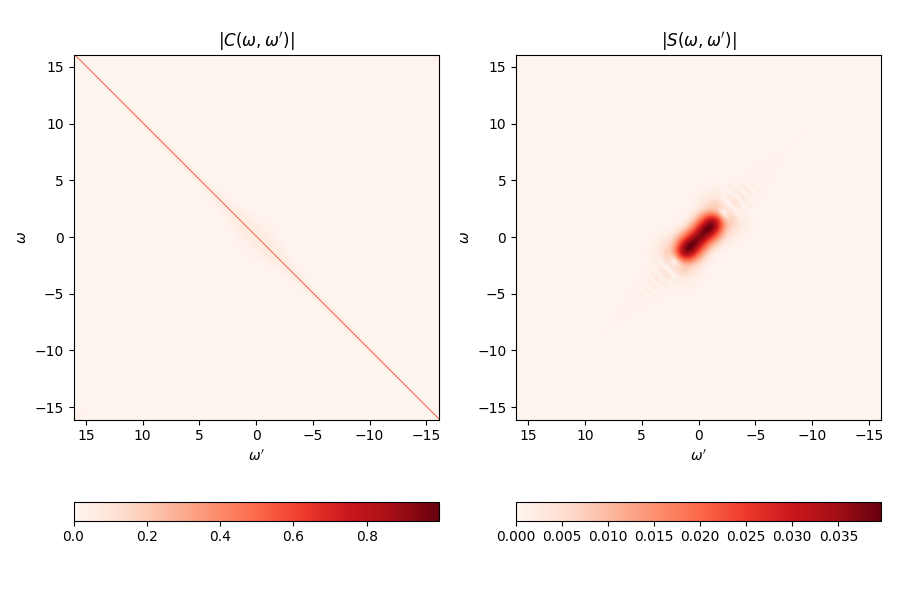

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(np.abs(C), cmap="Reds",
           extent=[angFreqMax__, -angFreqMax__, -angFreqMax__, angFreqMax__])

plt.title("$|C(\omega, \omega')|$")
plt.xlabel("$\omega'$")
plt.ylabel("$\omega$")
plt.colorbar(orientation="horizontal")

ax = fig.add_subplot(1, 2, 2)
plt.imshow(np.abs(S), cmap="Reds",
           extent=[angFreqMax__, -angFreqMax__, -angFreqMax__, angFreqMax__])

plt.title("$|S(\omega, \omega')|$")
plt.xlabel("$\omega'$")
plt.ylabel("$\omega$")
plt.colorbar(orientation="horizontal")

plt.tight_layout();

# Comparison to Figure 5

We compute the covariance matrix in the quadrature basis, and then compute the normalized covariance matrix, as defined in the text.

The covariance matrix $\text{Cov}(x_{f, i}, x_{f, j})$ is computed from the Green's matrix using that $(\vec x_f, \vec p_f)^\intercal = Z (\vec x_i, \vec p_i)^\intercal$

In [26]:
# Quadrature (x and p) transformation matrix
Z = calcQuadratureGreens(C, S)

# Covariance Matrix
Cov = calcCovarianceMtx(Z, tol=1e-3)

# Normalized Covariance Matrix
normalizedC = normalizedCov(Cov)

<IPython.core.display.Javascript object>


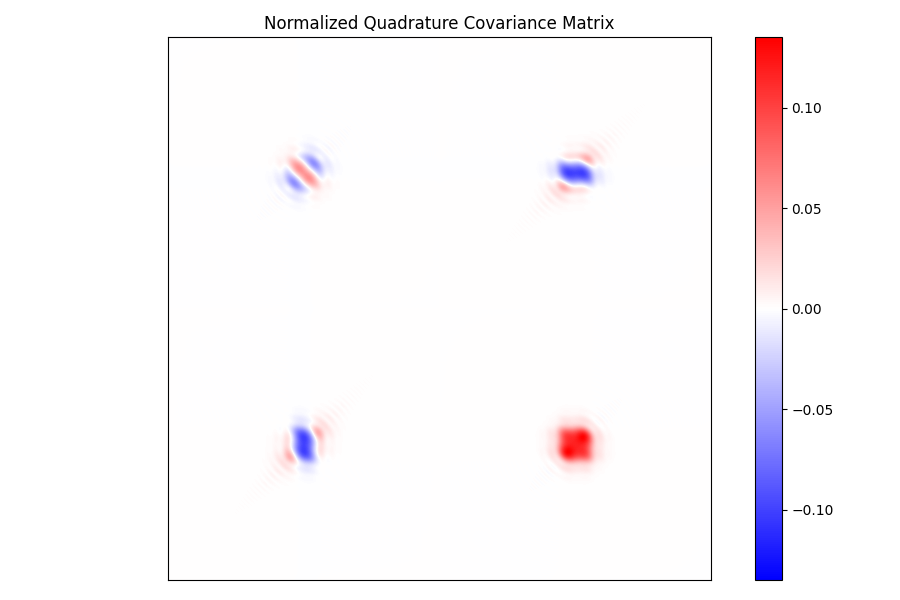

In [27]:
maxVal = np.max(np.abs(normalizedC))

fig = plt.figure()
plt.imshow(normalizedC, cmap="bwr", vmin=-maxVal, vmax=maxVal)
plt.title("Normalized Quadrature Covariance Matrix")
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.colorbar()
plt.tight_layout()

### Find the squeezing supermodes
Perform Bloch-Messiah decomposition to diagonalize the Green's matrix and find the independently-squeezed modes.

In [28]:
O1, D, O2 = bloch_messiah(Z, tol=5e-5)
diagSqueezing = D.diagonal()

<IPython.core.display.Javascript object>


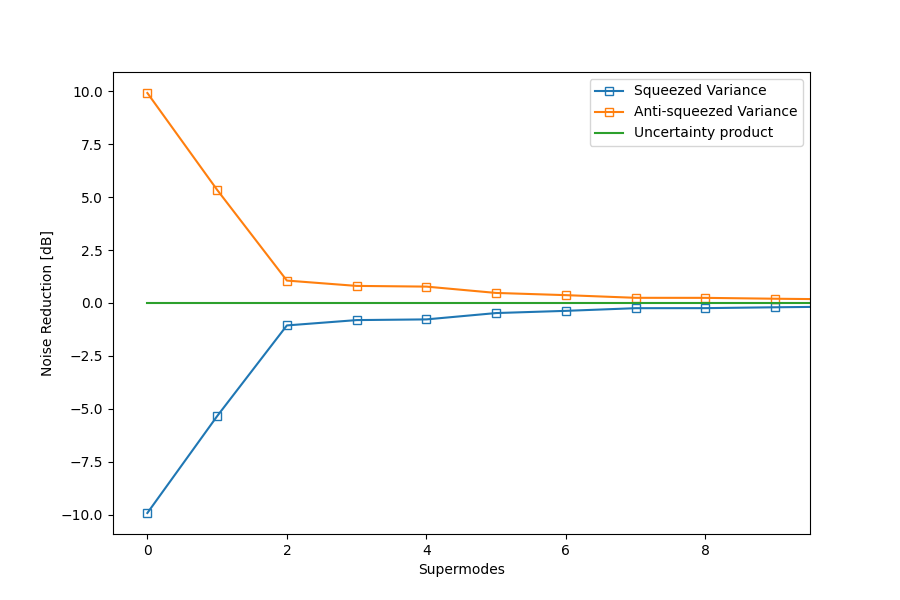

In [29]:
plt.figure()
plt.plot(20 * np.log10(diagSqueezing[nFreqs:]), "s-", markerfacecolor="none", label="Squeezed Variance")
plt.plot(20 * np.log10(diagSqueezing[:nFreqs]), "s-", markerfacecolor="none", label="Anti-squeezed Variance")
plt.plot(10 * np.log10(diagSqueezing[nFreqs:] * diagSqueezing[:nFreqs]), label="Uncertainty product")
plt.xlim(-0.5, 9.5)
plt.xlabel("Supermodes")
plt.ylabel("Noise Reduction [dB]")
plt.legend();

<IPython.core.display.Javascript object>


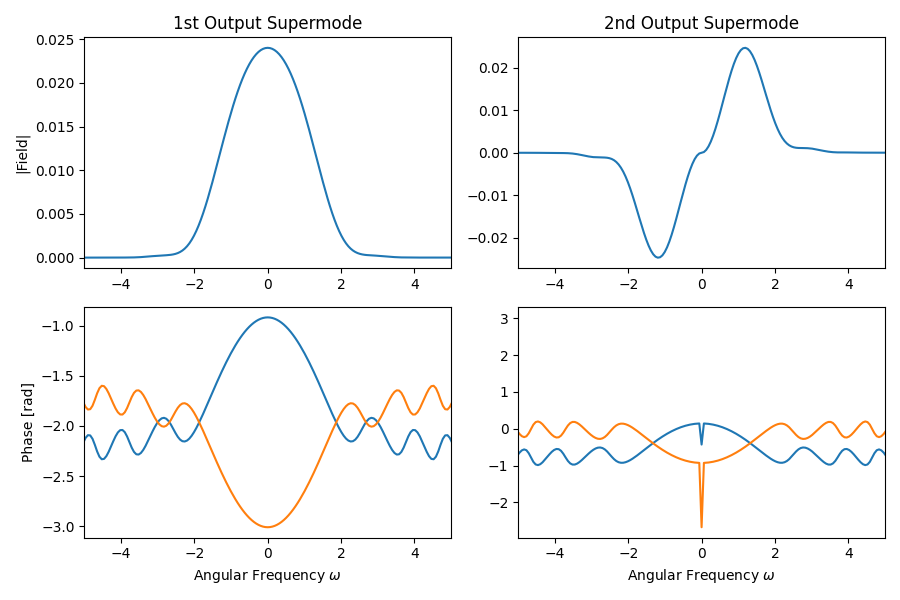

In [30]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
plt.plot(fftshift(fiber.omega), O1[:nFreqs, 0]**2 + O1[nFreqs:, 0]**2)
plt.xlim(-5, 5)
plt.title("1st Output Supermode")
plt.ylabel("|Field|")

ax = fig.add_subplot(2, 2, 3)
plt.plot(fftshift(fiber.omega), np.angle(O1[:nFreqs, 0] + 1j * O1[nFreqs:, 0]))
plt.plot(fftshift(fiber.omega), np.angle(O2[0, :nFreqs] + 1j * O2[0, nFreqs:]))
plt.xlim(-5, 5)
plt.xlabel("Angular Frequency $\omega$")
plt.ylabel("Phase [rad]")

ax = fig.add_subplot(2, 2, 2)
plt.plot(fftshift(fiber.omega),
         (O1[:nFreqs, 1]**2 + O1[nFreqs:, 1]**2) *
         -np.sign(np.angle(O1[:nFreqs, 1] + 1j * O1[:nFreqs, 1])))
plt.xlim(-5, 5)
plt.title("2nd Output Supermode")

ax = fig.add_subplot(2, 2, 4)
plt.plot(fftshift(fiber.omega),
         np.unwrap(np.angle(O1[:nFreqs, 1] + 1j * O1[nFreqs:, 1])
                   - np.pi * (fiber.omega < 0))) # account for the pi phase in the sign of the amplitude
plt.plot(fftshift(fiber.omega),
         np.unwrap(np.angle(O2[1, :nFreqs] + 1j * O2[1, nFreqs:])
                   - np.pi * (fiber.omega < 0)))
plt.xlim(-5, 5)
plt.xlabel("Angular Frequency $\omega$")

plt.tight_layout()